In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [85]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [86]:
#read data
time_series = pd.read_csv('time_series_od.csv', parse_dates=[0], index_col='Date').squeeze('columns')
time_series.index = pd.to_datetime(time_series.index)
time_series.drop('Unnamed: 0', axis=1, inplace=True)

In [87]:
time_series = time_series.asfreq(pd.infer_freq(time_series.index))

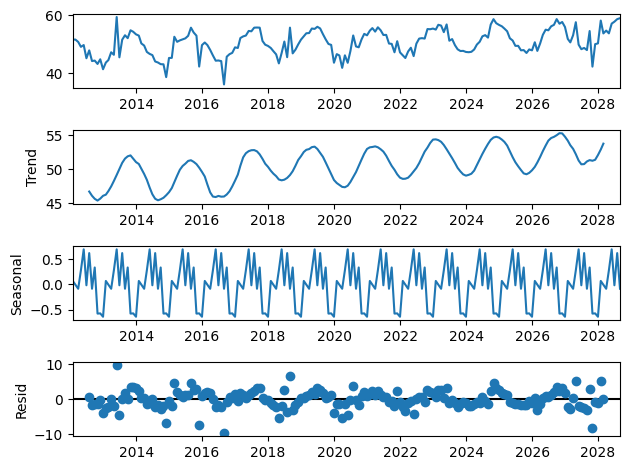

In [88]:
# seasonal decomposition of plot 
nresult = seasonal_decompose(time_series, model='additive', period=12)
nresult.plot()
plt.show()

In [89]:
# take a smaller sample
start_date = datetime(2014,1,1)
end_date = datetime(2023,1,1)
lim_time_series = time_series[start_date:end_date]

In [90]:
#At December 1 1998
lim_time_series[datetime(2017,12,1)] = 100

/var/folders/0j/dnd5nn45099d8yt1603ysnm00000gn/T/ipykernel_3956/866322241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lim_time_series[datetime(2017,12,1)] = 100


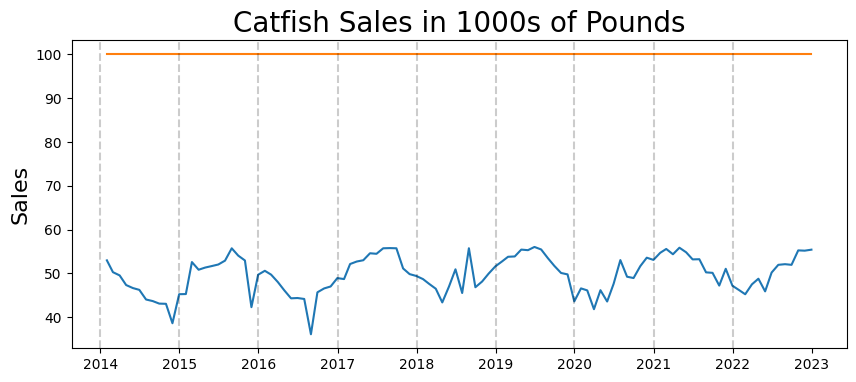

In [91]:
plt.figure(figsize=(10,4))
plt.plot(lim_time_series)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [92]:
first_diff = lim_time_series.diff()[1:]

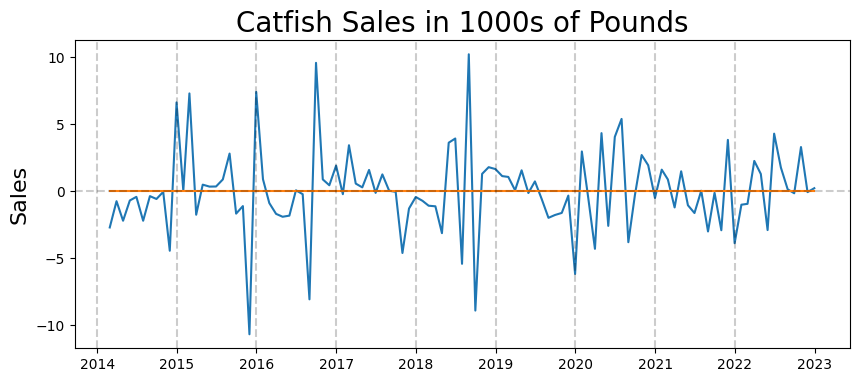

In [93]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

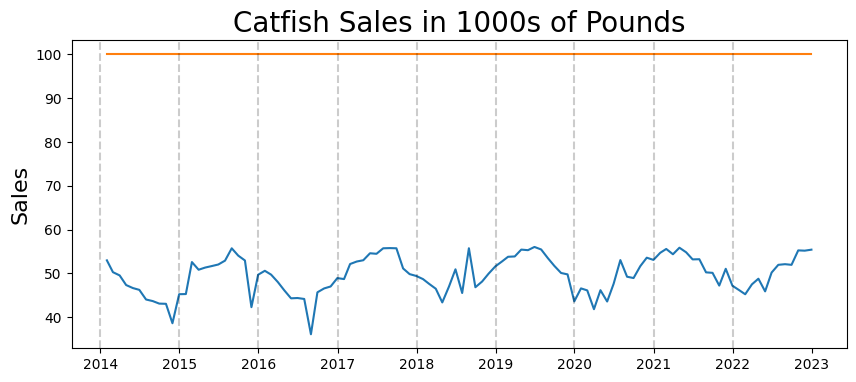

In [94]:
plt.figure(figsize=(10,4))
plt.plot(lim_time_series)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [95]:
rolling_deviations = pd.Series(dtype=float, index = lim_time_series.index)

In [96]:
for date in rolling_deviations.index:
    #get the window ending at this data point
    window = lim_time_series.loc[:date]
    
    #get the deviation within this window
    rolling_deviations.loc[date] = window.std()

In [97]:
#get the difference in deviation between one time point and the next
diff_rolling_deviations = rolling_deviations.diff()
diff_rolling_deviations = diff_rolling_deviations.dropna()

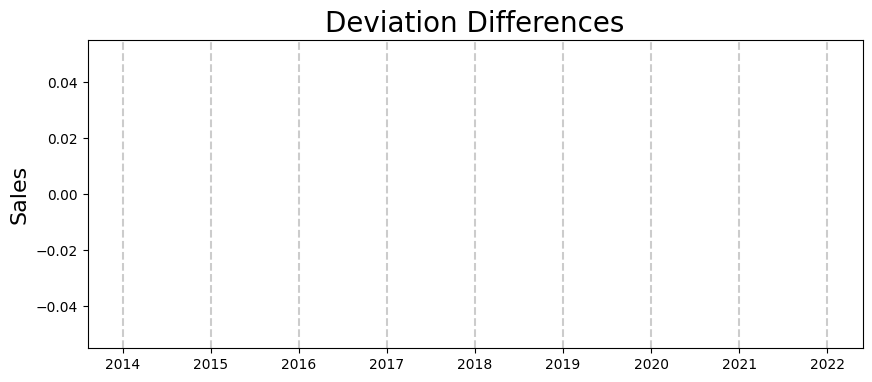

In [98]:
plt.figure(figsize=(10,4))
plt.plot(diff_rolling_deviations)
plt.title('Deviation Differences', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [100]:
month_deviations = lim_time_series.groupby(lambda d: d.month).std()

Text(0, 0.5, 'Sales')

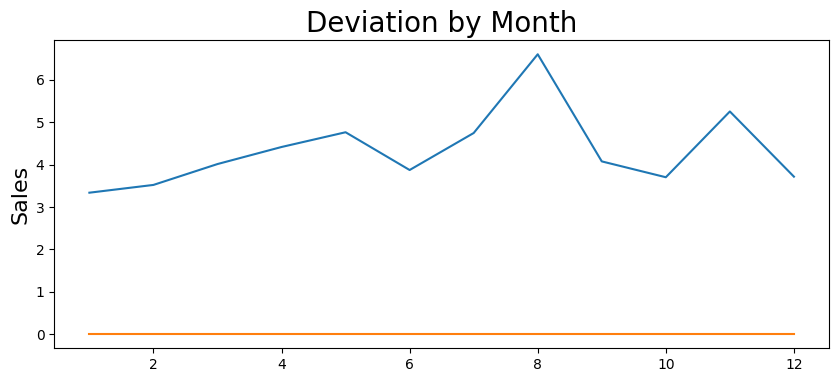

In [101]:
plt.figure(figsize=(10,4))
plt.plot(month_deviations)
plt.title('Deviation by Month', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [106]:
december_data = lim_time_series[lim_time_series.index.month == 8]

In [107]:
december_data

,value,2017-12-01 00:00:00
Date,,
2014-08-31,43.707692,100
2015-08-31,55.744678,100
2016-08-31,36.137155,100
2017-08-31,55.794708,100
2018-08-31,55.757044,100
2019-08-31,53.499468,100
2020-08-31,49.262748,100
2021-08-31,50.261149,100
2022-08-31,52.124568,100


In [108]:
min_dev = 9999999
curr_anomaly = None
for date in december_data.index:
    other_data = december_data[december_data.index != date]
    curr_dev = other_data.std()
    if curr_dev < min_dev:
        min_dev = curr_dev
        curr_anomaly = date

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [109]:
curr_anomaly